# MNIST Dataset-1: Recognition of Handwritten Digits

In this note, we will implement Keras to build neural network models to recognize handwritten digits using **mnist** data. Here my backend is **tensorflow**. We will show that by properly choosing the network structures and parameters, the best model trained can have accuracy close to 100% and 98% on the test dataset. Through the experiments, the best neural network shown is given by a three-hidden-layer network using **relu** activaction function. Moreover, the model performance and tranining accuracy is sensitive to choice of parameters initialization and loss functions.

We fetch mnist data from Yann LeCun's website. Using this dataset, the learning rate $\alpha$ is not irrelevant to the model performance and accuracy. We stick on using $\alpha$ = 0.1. However, we will see in the other note, mnist_digits_recognition-2, while using data from Keras, the learning rate is important!

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

In [3]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

## 0. The MNIST database

The handwritten digits data can be obtained from [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/). Each image is 28 pixels by 28 pixels and is labeled 0-9 to identify the digits 0-9. This is a 10-class classification problem.

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

### 55000 samples in training datasets:

In [6]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

### 10000 samples in test datasets:

In [7]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

### Each MNIST image is represented in a784-dimensional vector space with real number [0,1]:

In [54]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [8]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [11]:
type(mnist.train.images), type(mnist.train.labels.shape)

(numpy.ndarray, tuple)

### The images:

In [19]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

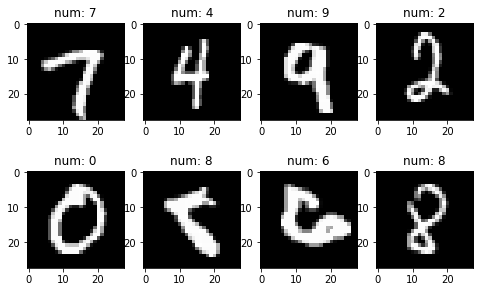

In [47]:
plotExamples(mnist.train.images, mnist.train.labels)

## 1. Training Neural Networks using Keras

Here we consider different neural network structures to train models. We compare the models by different number of neurons in hidden layers, different loss functions: **mse** and **categorical_crossentropy**, different activation functions: **sigoid** and **relu**, more hidden layers and even initialization. The neural network in the **mnist** data always has the input layer with 784 inputs and the output layer with 10 neurons (10 classes). 

Let us start with the neural network: one hidden layer with 100 neurons, using **sigmoid** as activation function in the hidden layer and output layer, and uniform initialization. For each variant, we will reveal how the structure infleunce the training results by comparing model performance. 

### (a) Initial network: 1-hidden layer with 100 neurons, sigmoid activation in all layers

At the beginning we compare using **mse** and **categorical_crossentropy** as loss functions. The result shows using **categorical_crossentropy** as loss functions has faster convergence, so we will stick on using **categorical_crossentropy**. Later we will revisit using **mse**.

#### Mean squared error (mse) as the loss function

In [48]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
## lr is the learning rate
sgd = SGD(lr=0.1) 
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model.fit(mnist.train.images, mnist.train.labels, batch_size=32, nb_epoch=20, verbose=2)

Epoch 1/20
4s - loss: 0.0916 - acc: 0.1263
Epoch 2/20
4s - loss: 0.0886 - acc: 0.2060
Epoch 3/20
4s - loss: 0.0861 - acc: 0.2575
Epoch 4/20
4s - loss: 0.0798 - acc: 0.3408
Epoch 5/20
4s - loss: 0.0715 - acc: 0.4701
Epoch 6/20
4s - loss: 0.0631 - acc: 0.5856
Epoch 7/20
4s - loss: 0.0557 - acc: 0.6770
Epoch 8/20
4s - loss: 0.0497 - acc: 0.7303
Epoch 9/20
4s - loss: 0.0447 - acc: 0.7681
Epoch 10/20
4s - loss: 0.0408 - acc: 0.7937
Epoch 11/20
4s - loss: 0.0377 - acc: 0.8150
Epoch 12/20
4s - loss: 0.0351 - acc: 0.8321
Epoch 13/20
4s - loss: 0.0330 - acc: 0.8453
Epoch 14/20
4s - loss: 0.0312 - acc: 0.8553
Epoch 15/20
4s - loss: 0.0297 - acc: 0.8617
Epoch 16/20
4s - loss: 0.0283 - acc: 0.8675
Epoch 17/20
4s - loss: 0.0271 - acc: 0.8724
Epoch 18/20
4s - loss: 0.0261 - acc: 0.8761
Epoch 19/20
4s - loss: 0.0252 - acc: 0.8785
Epoch 20/20
4s - loss: 0.0244 - acc: 0.8816


In [49]:
scores = model.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

 9856/10000 [============================>.] - ETA: 0s  Loss:  0.0229811948523  , acc: 0.8893


#### Categorical crosssentropy as the loss function

In [50]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(mnist.train.images, mnist.train.labels, batch_size=32, nb_epoch=20, verbose=2)
scores = model.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/20
5s - loss: 0.8876 - acc: 0.7504
Epoch 2/20
5s - loss: 0.3267 - acc: 0.9069
Epoch 3/20
4s - loss: 0.2731 - acc: 0.9215
Epoch 4/20
5s - loss: 0.2402 - acc: 0.9301
Epoch 5/20
5s - loss: 0.2144 - acc: 0.9383
Epoch 6/20
4s - loss: 0.1940 - acc: 0.9441
Epoch 7/20
4s - loss: 0.1770 - acc: 0.9482
Epoch 8/20
5s - loss: 0.1625 - acc: 0.9532
Epoch 9/20
5s - loss: 0.1507 - acc: 0.9564
Epoch 10/20
6s - loss: 0.1399 - acc: 0.9605
Epoch 11/20
7s - loss: 0.1309 - acc: 0.9621
Epoch 12/20
6s - loss: 0.1227 - acc: 0.9650
Epoch 13/20
6s - loss: 0.1153 - acc: 0.9670
Epoch 14/20
6s - loss: 0.1090 - acc: 0.9690
Epoch 15/20
6s - loss: 0.1031 - acc: 0.9711
Epoch 16/20
5s - loss: 0.0980 - acc: 0.9724
Epoch 17/20
5s - loss: 0.0931 - acc: 0.9739
Epoch 18/20
5s - loss: 0.0885 - acc: 0.9757
Epoch 19/20
5s - loss: 0.0846 - acc: 0.9764
Epoch 20/20
5s - loss: 0.0809 - acc: 0.9780
 9920/10000 [============================>.] - ETA: 0s  Loss:  0.0961783868916  , acc: 0.9709


**categorical_crossentropy** shows faster convergence. Thus we will stick on using **categorical_crossentropy** as loss function.

### (b) Implement softmax to activation function in the output layers

#### sigmoid activation -> softmax activation in the output layer

In [46]:
model2 = Sequential()
model2.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model2.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.1) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(mnist.train.images, mnist.train.labels, batch_size=32, nb_epoch=20, verbose=2)
scores = model2.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/20
6s - loss: 0.7350 - acc: 0.7968
Epoch 2/20
5s - loss: 0.3181 - acc: 0.9087
Epoch 3/20
5s - loss: 0.2695 - acc: 0.9218
Epoch 4/20
6s - loss: 0.2369 - acc: 0.9322
Epoch 5/20
7s - loss: 0.2123 - acc: 0.9391
Epoch 6/20
6s - loss: 0.1915 - acc: 0.9447
Epoch 7/20
5s - loss: 0.1747 - acc: 0.9496
Epoch 8/20
5s - loss: 0.1605 - acc: 0.9540
Epoch 9/20
5s - loss: 0.1482 - acc: 0.9576
Epoch 10/20
5s - loss: 0.1376 - acc: 0.9605
Epoch 11/20
5s - loss: 0.1285 - acc: 0.9632
Epoch 12/20
5s - loss: 0.1204 - acc: 0.9654
Epoch 13/20
5s - loss: 0.1131 - acc: 0.9672
Epoch 14/20
5s - loss: 0.1068 - acc: 0.9695
Epoch 15/20
5s - loss: 0.1011 - acc: 0.9712
Epoch 16/20
5s - loss: 0.0962 - acc: 0.9730
Epoch 17/20
5s - loss: 0.0914 - acc: 0.9743
Epoch 18/20
5s - loss: 0.0871 - acc: 0.9757
Epoch 19/20
5s - loss: 0.0831 - acc: 0.9767
Epoch 20/20
5s - loss: 0.0795 - acc: 0.9779
 9984/10000 [============================>.] - ETA: 0s  Loss:  0.0961759171788  , acc: 0.9702


Here it shows the selection of **sigmoid** and **softmax** in the output layer is only slightly relevant or even irrelevant to the model accuracy.

### (c) Enlarge the number of neurons in the hidden layer to 400

#### number of neurons 100 -> 400

In [51]:
model3 = Sequential()
model3.add(Dense(400, input_dim=784, init='uniform', activation='sigmoid'))
model3.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.1) 
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model3.fit(mnist.train.images, mnist.train.labels, batch_size=32, nb_epoch=50, verbose=2)
scores = model3.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
8s - loss: 0.6437 - acc: 0.8080
Epoch 2/50
8s - loss: 0.3286 - acc: 0.9044
Epoch 3/50
8s - loss: 0.2952 - acc: 0.9147
Epoch 4/50
8s - loss: 0.2705 - acc: 0.9210
Epoch 5/50
8s - loss: 0.2481 - acc: 0.9286
Epoch 6/50
8s - loss: 0.2266 - acc: 0.9346
Epoch 7/50
8s - loss: 0.2070 - acc: 0.9403
Epoch 8/50
8s - loss: 0.1895 - acc: 0.9461
Epoch 9/50
8s - loss: 0.1750 - acc: 0.9492
Epoch 10/50
8s - loss: 0.1612 - acc: 0.9544
Epoch 11/50
8s - loss: 0.1500 - acc: 0.9572
Epoch 12/50
8s - loss: 0.1395 - acc: 0.9601
Epoch 13/50
8s - loss: 0.1303 - acc: 0.9635
Epoch 14/50
8s - loss: 0.1219 - acc: 0.9656
Epoch 15/50
8s - loss: 0.1148 - acc: 0.9674
Epoch 16/50
8s - loss: 0.1082 - acc: 0.9693
Epoch 17/50
8s - loss: 0.1021 - acc: 0.9713
Epoch 18/50
8s - loss: 0.0967 - acc: 0.9730
Epoch 19/50
8s - loss: 0.0917 - acc: 0.9739
Epoch 20/50
8s - loss: 0.0869 - acc: 0.9758
Epoch 21/50
8s - loss: 0.0826 - acc: 0.9769
Epoch 22/50
8s - loss: 0.0787 - acc: 0.9782
Epoch 23/50
8s - loss: 0.0752 - acc: 0.97

Obviously more nerons in the hidden layer is helpful! The training accuracy is enhanced to 99% though the model on the test sets still has similar performance.

### (d) Add more hidden layers: 3 hidden layers with 200-200-100 neurons
#### one hidden layer -> 3 hidden layers

In [75]:
model4 = Sequential()
model4.add(Dense(200, input_dim=784, init='uniform', activation='sigmoid'))
model4.add(Dense(200, init='uniform', activation='sigmoid'))
model4.add(Dense(100, init='uniform', activation='sigmoid'))
model4.add(Dense(10,  init='uniform', activation='softmax'))
sgd = SGD(lr=0.1) 
model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model4.fit(mnist.train.images, mnist.train.labels, batch_size=16, nb_epoch=50, verbose=2)
scores = model4.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
19s - loss: 2.3119 - acc: 0.1069
Epoch 2/50
16s - loss: 2.2996 - acc: 0.1193
Epoch 3/50
14s - loss: 1.9507 - acc: 0.2768
Epoch 4/50
16s - loss: 1.3733 - acc: 0.4822
Epoch 5/50
17s - loss: 0.7101 - acc: 0.7800
Epoch 6/50
17s - loss: 0.4131 - acc: 0.8841
Epoch 7/50
18s - loss: 0.2813 - acc: 0.9195
Epoch 8/50
15s - loss: 0.2248 - acc: 0.9360
Epoch 9/50
17s - loss: 0.1856 - acc: 0.9458
Epoch 10/50
16s - loss: 0.1579 - acc: 0.9538
Epoch 11/50
16s - loss: 0.1360 - acc: 0.9598
Epoch 12/50
15s - loss: 0.1188 - acc: 0.9653
Epoch 13/50
14s - loss: 0.1052 - acc: 0.9692
Epoch 14/50
14s - loss: 0.0937 - acc: 0.9723
Epoch 15/50
14s - loss: 0.0841 - acc: 0.9747
Epoch 16/50
14s - loss: 0.0765 - acc: 0.9771
Epoch 17/50
13s - loss: 0.0677 - acc: 0.9802
Epoch 18/50
14s - loss: 0.0621 - acc: 0.9816
Epoch 19/50
20s - loss: 0.0555 - acc: 0.9833
Epoch 20/50
16s - loss: 0.0510 - acc: 0.9845
Epoch 21/50
16s - loss: 0.0451 - acc: 0.9869
Epoch 22/50
15s - loss: 0.0410 - acc: 0.9879
Epoch 23/50
14s - l

With more hidden layers, the trained model shows almost perfect accuracy (99.99%). For the test set, the model also shows to have accuracy of 98%. However, more hidden layers needs more iterations to get converegence. For example, at the beginning few epoches, the model accuracies are 0.1069 and 0.1193, which are worse than that using one hidden layer.

### (e) Initialization

#### Remove init = 'uniform'

In [76]:
model5 = Sequential()
model5.add(Dense(200, input_dim=784, activation='sigmoid'))
model5.add(Dense(200, activation='sigmoid'))
model5.add(Dense(100, activation='sigmoid'))
model5.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.1) 
model5.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model5.fit(mnist.train.images, mnist.train.labels, batch_size=16, nb_epoch=50, verbose=2)
scores = model5.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
14s - loss: 1.0521 - acc: 0.6377
Epoch 2/50
14s - loss: 0.3380 - acc: 0.9008
Epoch 3/50
14s - loss: 0.2532 - acc: 0.9256
Epoch 4/50
14s - loss: 0.1984 - acc: 0.9411
Epoch 5/50
14s - loss: 0.1609 - acc: 0.9523
Epoch 6/50
14s - loss: 0.1370 - acc: 0.9585
Epoch 7/50
14s - loss: 0.1172 - acc: 0.9651
Epoch 8/50
14s - loss: 0.1027 - acc: 0.9688
Epoch 9/50
14s - loss: 0.0891 - acc: 0.9733
Epoch 10/50
14s - loss: 0.0800 - acc: 0.9763
Epoch 11/50
15s - loss: 0.0715 - acc: 0.9777
Epoch 12/50
15s - loss: 0.0639 - acc: 0.9802
Epoch 13/50
14s - loss: 0.0560 - acc: 0.9832
Epoch 14/50
14s - loss: 0.0501 - acc: 0.9850
Epoch 15/50
15s - loss: 0.0443 - acc: 0.9863
Epoch 16/50
20s - loss: 0.0392 - acc: 0.9882
Epoch 17/50
17s - loss: 0.0353 - acc: 0.9897
Epoch 18/50
17s - loss: 0.0313 - acc: 0.9908
Epoch 19/50
16s - loss: 0.0275 - acc: 0.9918
Epoch 20/50
23s - loss: 0.0252 - acc: 0.9922
Epoch 21/50
21s - loss: 0.0201 - acc: 0.9948
Epoch 22/50
14s - loss: 0.0188 - acc: 0.9944
Epoch 23/50
14s - l

In the previous neural network, the weight parameters were initialized by a uniform function. Here we generate the parameters using default initialization function in Keras, showing that the early epoches the model has better performance than one using uniform initialization function.

### (f) Implement relu activation in the hidden layers

#### sigmoid activcation -> relu activaction 

In [78]:
model6 = Sequential()
model6.add(Dense(200, input_dim=784, activation='relu'))
model6.add(Dense(200, activation='relu'))
model6.add(Dense(100, activation='relu'))
model6.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.1) 
model6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model6.fit(mnist.train.images, mnist.train.labels, batch_size=16, nb_epoch=30, verbose=2)
scores = model6.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/30
15s - loss: 0.2487 - acc: 0.9227
Epoch 2/30
17s - loss: 0.1063 - acc: 0.9667
Epoch 3/30
17s - loss: 0.0752 - acc: 0.9770
Epoch 4/30
18s - loss: 0.0563 - acc: 0.9823
Epoch 5/30
19s - loss: 0.0436 - acc: 0.9862
Epoch 6/30
16s - loss: 0.0368 - acc: 0.9880
Epoch 7/30
16s - loss: 0.0309 - acc: 0.9903
Epoch 8/30
16s - loss: 0.0248 - acc: 0.9921
Epoch 9/30
18s - loss: 0.0187 - acc: 0.9939
Epoch 10/30
17s - loss: 0.0179 - acc: 0.9943
Epoch 11/30
14s - loss: 0.0200 - acc: 0.9934
Epoch 12/30
14s - loss: 0.0131 - acc: 0.9958
Epoch 13/30
13s - loss: 0.0151 - acc: 0.9951
Epoch 14/30
14s - loss: 0.0140 - acc: 0.9957
Epoch 15/30
13s - loss: 0.0104 - acc: 0.9968
Epoch 16/30
14s - loss: 0.0091 - acc: 0.9973
Epoch 17/30
14s - loss: 0.0124 - acc: 0.9960
Epoch 18/30
15s - loss: 0.0078 - acc: 0.9975
Epoch 19/30
15s - loss: 0.0133 - acc: 0.9957
Epoch 20/30
14s - loss: 0.0059 - acc: 0.9981
Epoch 21/30
13s - loss: 0.0048 - acc: 0.9984
Epoch 22/30
13s - loss: 0.0118 - acc: 0.9961
Epoch 23/30
13s - l

Using **relu** even converges faster, since in the previous case using sigmod activation function, the 100% accuracy happened at the 40-epoch, but here at 28-th epoch the model accuracy has been about 100%.

#### From the benchmarks, the best network is given by multiple hidden layer. Using relu and default initialization show faster convergence for training the models. 

## 2. Prediction

**model.predict(X)** gives the probability of each class, and **model.predict_classes(X)** directly gives the class. The highest probability identifies the class which the image is.

In [69]:
predictions = model5.predict(mnist.test.images)
print (predictions[:8])

[[  2.32193374e-21   2.14999036e-14   1.09257340e-14   3.19410599e-17
    2.05686366e-14   3.64200596e-21   1.85665959e-21   1.00000000e+00
    2.03881241e-16   9.47486989e-13]
 [  1.03341797e-14   3.32954316e-15   1.00000000e+00   2.59395833e-17
    6.71541410e-19   7.84372000e-19   1.95160837e-18   8.02996953e-20
    1.56550932e-16   1.12891557e-23]
 [  1.91516280e-16   1.00000000e+00   2.94681879e-12   2.92172170e-17
    2.73391223e-11   5.84677706e-14   3.69494583e-13   3.03999556e-12
    4.48173009e-12   6.35018906e-14]
 [  1.00000000e+00   9.61116974e-19   2.06171094e-10   5.55445116e-15
    3.29830585e-15   3.67964021e-14   8.74113004e-11   1.01537196e-15
    1.00236307e-17   4.42005721e-15]
 [  1.47901592e-14   1.17368206e-13   3.26535604e-11   5.74674334e-17
    1.00000000e+00   1.10158731e-15   9.50973512e-14   9.46095112e-12
    5.46443782e-15   1.31592415e-09]
 [  5.44018094e-17   1.00000000e+00   1.86798683e-14   8.85652687e-18
    1.17272997e-11   1.75686227e-16   5.23730

In [71]:
predictions = model5.predict_classes(mnist.test.images)
print (predictions[:8])

10000/10000 [==============================] - 0s     
[7 2 1 0 4 1 4 9]


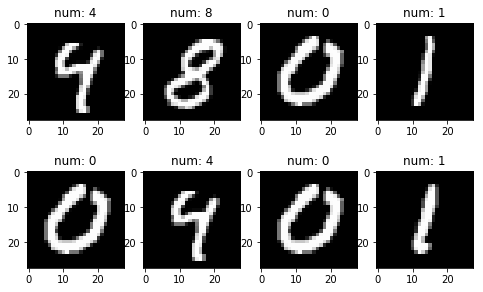

In [72]:
plotExamples(mnist.train.images[:8], mnist.train.labels[:8])

## 3. Revisit the "mse" loss function and uniform initialization

Here we will revisit the model and study how important to choose a loss function. With **mse** as loss function, even in the same neural network, the convergence is always slower than using **categorical_crossentropy**. The uniform initialization further makes the model worse. However, by choosing **relu**, we can still improve the model performance.

### Using "mse" loss function converges more slowly

In [61]:
model7 = Sequential()
model7.add(Dense(200, input_dim=784, activation='sigmoid'))
model7.add(Dense(200, activation='sigmoid'))
model7.add(Dense(100, activation='sigmoid'))
model7.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.1) 
model7.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model7.fit(mnist.train.images, mnist.train.labels, batch_size=32, nb_epoch=50, verbose=2)
scores = model7.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
8s - loss: 0.0903 - acc: 0.1160
Epoch 2/50
8s - loss: 0.0899 - acc: 0.1168
Epoch 3/50
10s - loss: 0.0898 - acc: 0.1160
Epoch 4/50
9s - loss: 0.0898 - acc: 0.1189
Epoch 5/50
8s - loss: 0.0897 - acc: 0.1362
Epoch 6/50
7s - loss: 0.0896 - acc: 0.1361
Epoch 7/50
9s - loss: 0.0895 - acc: 0.1542
Epoch 8/50
9s - loss: 0.0894 - acc: 0.1612
Epoch 9/50
11s - loss: 0.0893 - acc: 0.1933
Epoch 10/50
10s - loss: 0.0891 - acc: 0.1980
Epoch 11/50
8s - loss: 0.0889 - acc: 0.2237
Epoch 12/50
9s - loss: 0.0886 - acc: 0.2191
Epoch 13/50
7s - loss: 0.0882 - acc: 0.2411
Epoch 14/50
8s - loss: 0.0876 - acc: 0.2248
Epoch 15/50
8s - loss: 0.0866 - acc: 0.2280
Epoch 16/50
8s - loss: 0.0846 - acc: 0.2289
Epoch 17/50
9s - loss: 0.0811 - acc: 0.2535
Epoch 18/50
8s - loss: 0.0770 - acc: 0.3193
Epoch 19/50
9s - loss: 0.0734 - acc: 0.3715
Epoch 20/50
8s - loss: 0.0702 - acc: 0.4072
Epoch 21/50
8s - loss: 0.0670 - acc: 0.4420
Epoch 22/50
10s - loss: 0.0640 - acc: 0.4829
Epoch 23/50
11s - loss: 0.0609 - acc:

### Using uniform initialization + mse loss shows poor performance

In [62]:
model8 = Sequential()
model8.add(Dense(200, input_dim=784, init='uniform', activation='sigmoid'))
model8.add(Dense(200, init='uniform', activation='sigmoid'))
model8.add(Dense(100, init='uniform', activation='sigmoid'))
model8.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.1) 
model8.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model8.fit(mnist.train.images, mnist.train.labels, batch_size=32, nb_epoch=30, verbose=2)
scores = model8.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/30
8s - loss: 0.0900 - acc: 0.1095
Epoch 2/30
7s - loss: 0.0900 - acc: 0.1115
Epoch 3/30
7s - loss: 0.0900 - acc: 0.1117
Epoch 4/30
7s - loss: 0.0900 - acc: 0.1114
Epoch 5/30
8s - loss: 0.0900 - acc: 0.1117
Epoch 6/30
10s - loss: 0.0900 - acc: 0.1117
Epoch 7/30
8s - loss: 0.0900 - acc: 0.1119
Epoch 8/30
9s - loss: 0.0900 - acc: 0.1121
Epoch 9/30
10s - loss: 0.0900 - acc: 0.1117
Epoch 10/30
7s - loss: 0.0900 - acc: 0.1123
Epoch 11/30
7s - loss: 0.0900 - acc: 0.1113
Epoch 12/30
10s - loss: 0.0900 - acc: 0.1120
Epoch 13/30
10s - loss: 0.0900 - acc: 0.1120
Epoch 14/30
10s - loss: 0.0900 - acc: 0.1123
Epoch 15/30
9s - loss: 0.0900 - acc: 0.1121
Epoch 16/30
7s - loss: 0.0900 - acc: 0.1123
Epoch 17/30
8s - loss: 0.0900 - acc: 0.1120
Epoch 18/30
8s - loss: 0.0900 - acc: 0.1117
Epoch 19/30
9s - loss: 0.0900 - acc: 0.1119
Epoch 20/30
8s - loss: 0.0900 - acc: 0.1122
Epoch 21/30
7s - loss: 0.0900 - acc: 0.1123
Epoch 22/30
11s - loss: 0.0900 - acc: 0.1123
Epoch 23/30
14s - loss: 0.0900 - ac

### Using relu activaction function slightly better than using sigmoid

In the previous case, we saw the trained model got stuck to have low accuracy. However, using **relu** is helpful.  

In [74]:
model9 = Sequential()
model9.add(Dense(200, input_dim=784, init='uniform', activation='relu'))
model9.add(Dense(200, init='uniform', activation='relu'))
model9.add(Dense(100, init='uniform', activation='relu'))
model9.add(Dense(10, init='uniform', activation='softmax'))
sgd = SGD(lr=0.1) 
model9.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model9.fit(mnist.train.images, mnist.train.labels, batch_size=32, nb_epoch=50, verbose=2)
scores = model9.evaluate(mnist.test.images, mnist.test.labels);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
8s - loss: 0.0900 - acc: 0.1209
Epoch 2/50
8s - loss: 0.0899 - acc: 0.1173
Epoch 3/50
9s - loss: 0.0897 - acc: 0.1925
Epoch 4/50
9s - loss: 0.0892 - acc: 0.2190
Epoch 5/50
7s - loss: 0.0848 - acc: 0.2252
Epoch 6/50
7s - loss: 0.0761 - acc: 0.3729
Epoch 7/50
7s - loss: 0.0491 - acc: 0.6571
Epoch 8/50
7s - loss: 0.0268 - acc: 0.8260
Epoch 9/50
7s - loss: 0.0208 - acc: 0.8652
Epoch 10/50
7s - loss: 0.0181 - acc: 0.8823
Epoch 11/50
7s - loss: 0.0164 - acc: 0.8934
Epoch 12/50
8s - loss: 0.0150 - acc: 0.9032
Epoch 13/50
7s - loss: 0.0137 - acc: 0.9114
Epoch 14/50
10s - loss: 0.0127 - acc: 0.9188
Epoch 15/50
8s - loss: 0.0116 - acc: 0.9256
Epoch 16/50
8s - loss: 0.0107 - acc: 0.9314
Epoch 17/50
8s - loss: 0.0099 - acc: 0.9379
Epoch 18/50
7s - loss: 0.0092 - acc: 0.9415
Epoch 19/50
7s - loss: 0.0086 - acc: 0.9461
Epoch 20/50
7s - loss: 0.0080 - acc: 0.9495
Epoch 21/50
7s - loss: 0.0075 - acc: 0.9527
Epoch 22/50
7s - loss: 0.0071 - acc: 0.9553
Epoch 23/50
8s - loss: 0.0066 - acc: 0.9

## Summary

The best neural network is given by the 3-hidden-layer network structure 784-200-200-100-10, and using **relu** as activation function in the hidden layers and **softmax** in the output layer as well as the default initialization to train the models. For the multilcass classification, **categorical_crossentropy** loss function is preferred.